Purpose: Data processing for generating a lollipop chart of the vaccination rate in various countries.

Data Source: https://github.com/owid/covid-19-data/tree/master/public/data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('./data/owid-covid-data.csv')
data.head()

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


It looks like there are many rows for each country, representing data for different days. Let's see how many rows there are in total.

In [6]:
print(data.shape)

(80096, 60)


That is quite a lot of rows, so we will need to reduce that down at some point, so that we only use data from the most recent day. We are interested in the vaccination data so let's list the columns so that we can find the most relevant column.

In [7]:
print(data.columns)

Index(['Unnamed: 0', 'iso_code', 'continent', 'location', 'date',
       'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccin

The `people_vaccinated_per_hundred` column looks most relevant to the plot we are making. Let's filter out all of the columns except for this one and the `location` column.

In [10]:
vaccinated = data[['location', 'people_vaccinated_per_hundred']]
vaccinated.head()

,location,people_vaccinated_per_hundred
0,Afghanistan,NaN
1,Afghanistan,NaN
2,Afghanistan,NaN
3,Afghanistan,NaN
4,Afghanistan,NaN


We only want the most recent data that's available. We could do this by finding the most recent day for which we have data, but we are not guaranteed that there will be data for all countries for that day. Let's instead look for the highest value for the `people_vaccinated_per_hundred` column, as this value should only really ever go up (unless some counting error has been corrected at a later date).

In [20]:
vaccinated = vaccinated.groupby(['location']).max().reset_index().dropna()
vaccinated.sort_values(by='people_vaccinated_per_hundred', ascending=False).head(10)

,location,people_vaccinated_per_hundred
57,Gibraltar,95.85
136,Seychelles,65.21
49,Falkland Islands,62.79
74,Israel,61.18
21,Bhutan,61.04
129,Saint Helena,51.18
73,Isle of Man,49.21
93,Maldives,48.15
30,Cayman Islands,47.63
161,United Kingdom,46.71


In [21]:
print(vaccinated.location.unique())

['Afghanistan' 'Africa' 'Albania' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Asia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Bermuda' 'Bhutan' 'Bolivia' 'Botswana' 'Brazil'
 'Brunei' 'Bulgaria' 'Cambodia' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Chile' 'Colombia' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cyprus'
 'Czechia' 'Denmark' 'Dominica' 'Dominican Republic' 'Ecuador'
 'El Salvador' 'Equatorial Guinea' 'Estonia' 'Eswatini' 'Europe'
 'European Union' 'Faeroe Islands' 'Falkland Islands' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Gibraltar' 'Greece'
 'Greenland' 'Grenada' 'Guatemala' 'Guernsey' 'Guyana' 'Honduras'
 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Isle of Man' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jersey'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos'
 'Latvia' 'Lebanon' 'Lithuania' 'Luxembourg' 'M

There are too many countries to plot on one lollipop chart, so let's pick out some countries. The choice is arbitrary, but I was mostly interested in the larger european countries plus a few others.

In [30]:
countries = ['Belgium','France','Germany','United Kingdom','United States','Spain','Italy','Netherlands','Russia','China','World','European Union']
vaccinated = vaccinated[vaccinated.location.isin(countries)].sort_values(by=['people_vaccinated_per_hundred'], ascending=False)
vaccinated

,location,people_vaccinated_per_hundred
161,United Kingdom,46.71
162,United States,32.89
51,France,14.03
18,Belgium,13.87
145,Spain,13.72
75,Italy,13.43
55,Germany,12.88
107,Netherlands,9.85
127,Russia,5.42


<StemContainer object of 3 artists>

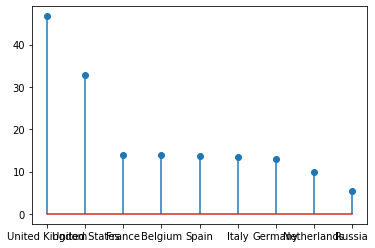

In [29]:
plt.stem(vaccinated.location, vaccinated.people_vaccinated_per_hundred, use_line_collection=True)